In [1]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import IPython.display as ipd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X = pd.read_csv('complete_unscaled_dataset2.csv', index_col = 0, header = [0])

tracks_genres = pd.read_csv('tracks_genres_mio2.csv', index_col = 0, header = [0])
#Alcune tracce presenti in tracks_genres.csv potrebbero non funzionare, quindi tengo solo le tracce di cui sono riuscito ad estrarre le feature
y = tracks_genres.loc[X.index,  'genre']

#Divido training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#Fit e scaling sul training set
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Oversampling dei dati di training
#SMOTE resampling
#from imblearn.over_sampling import SMOTE, ADASYN
#X_resampled, y_resampled = SMOTE().fit_resample(X_scaled, y)

In [2]:
#Fit e scaling sul training set
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

rfe_selector = RFECV(estimator=LogisticRegression(random_state=0, max_iter = 2000), step=1)
rfe_selector.fit(X_scaled, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

229 selected features


In [3]:
print(rfe_selector.get_params())

{'cv': None, 'estimator__C': 1.0, 'estimator__class_weight': None, 'estimator__dual': False, 'estimator__fit_intercept': True, 'estimator__intercept_scaling': 1, 'estimator__l1_ratio': None, 'estimator__max_iter': 2000, 'estimator__multi_class': 'auto', 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__random_state': 0, 'estimator__solver': 'lbfgs', 'estimator__tol': 0.0001, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': LogisticRegression(max_iter=2000, random_state=0), 'min_features_to_select': 1, 'n_jobs': None, 'scoring': None, 'step': 1, 'verbose': 0}


In [4]:
ipd.display(rfe_feature)

["('mfcc', 'mean', '1')",
 "('mfcc', 'mean', '2')",
 "('mfcc', 'mean', '3')",
 "('mfcc', 'mean', '4')",
 "('mfcc', 'mean', '5')",
 "('mfcc', 'mean', '6')",
 "('mfcc', 'mean', '7')",
 "('mfcc', 'mean', '8')",
 "('mfcc', 'mean', '9')",
 "('mfcc', 'mean', '10')",
 "('mfcc', 'mean', '11')",
 "('mfcc', 'mean', '12')",
 "('mfcc', 'std', '1')",
 "('mfcc', 'std', '2')",
 "('mfcc', 'std', '3')",
 "('mfcc', 'std', '4')",
 "('mfcc', 'std', '5')",
 "('mfcc', 'std', '6')",
 "('mfcc', 'std', '7')",
 "('mfcc', 'std', '8')",
 "('mfcc', 'std', '9')",
 "('mfcc', 'std', '10')",
 "('mfcc', 'std', '11')",
 "('mfcc', 'std', '12')",
 "('mfcc', 'max', '1')",
 "('mfcc', 'max', '2')",
 "('mfcc', 'max', '3')",
 "('mfcc', 'max', '4')",
 "('mfcc', 'max', '5')",
 "('mfcc', 'max', '6')",
 "('mfcc', 'max', '7')",
 "('mfcc', 'max', '8')",
 "('mfcc', 'max', '9')",
 "('mfcc', 'max', '10')",
 "('mfcc', 'max', '11')",
 "('mfcc', 'max', '12')",
 "('mfcc', 'min', '1')",
 "('mfcc', 'min', '2')",
 "('mfcc', 'min', '3')",
 "('

In [5]:
X_train_scaled_df = pd.DataFrame(data=X_train_scaled, columns = X.columns)
X_test_scaled_df = pd.DataFrame(data=X_test_scaled, columns = X.columns)

new_X_train_scaled = X_train_scaled_df.loc[ : , rfe_feature ]
new_X_test_scaled = X_test_scaled_df.loc[ : , rfe_feature ]
new_complete_unscaled_dataset = X.loc[ : , rfe_feature ]

In [6]:
ipd.display(new_X_train_scaled)

,"('mfcc', 'mean', '1')","('mfcc', 'mean', '2')","('mfcc', 'mean', '3')","('mfcc', 'mean', '4')","('mfcc', 'mean', '5')","('mfcc', 'mean', '6')","('mfcc', 'mean', '7')","('mfcc', 'mean', '8')","('mfcc', 'mean', '9')","('mfcc', 'mean', '10')",...,"('contrast', 'skew', '3')","('contrast', 'skew', '4')","('contrast', 'skew', '5')","('contrast', 'skew', '6')","('contrast', 'kurtosis', '1')","('contrast', 'kurtosis', '2')","('contrast', 'kurtosis', '3')","('contrast', 'kurtosis', '4')","('contrast', 'kurtosis', '5')","('contrast', 'kurtosis', '6')"
0,0.358346,-0.392125,-0.625092,0.097968,-1.000884,-1.285208,-0.783233,-1.681204,0.226844,-1.361145,...,-0.350060,-0.812709,-0.596442,-0.732626,0.702472,-0.224109,-0.161804,-0.402169,-0.525696,-0.619254
1,-0.649440,0.568524,-0.378565,-0.272611,-0.070639,0.062965,-0.837034,-0.465356,-0.522896,0.157489,...,0.834123,2.526841,0.817101,0.351460,-0.366489,-0.213213,0.058704,1.535227,-0.138326,0.450547
2,-0.022787,-0.450542,0.047828,-0.638591,-0.592490,-0.532755,-0.444316,-0.528964,-0.174233,-0.325966,...,0.049241,0.861453,-0.170857,0.778765,-0.344661,-0.592479,-0.350393,0.292733,-0.359217,0.569085
3,0.742223,0.005785,-1.502171,0.871068,0.571317,0.332460,0.037412,0.233263,0.311890,-0.259384,...,1.040138,0.923565,0.174294,-0.625165,0.221781,-0.002527,0.641359,-0.021369,-0.044573,-0.333129
4,1.071824,-2.632511,0.708163,-0.094058,0.627534,0.711103,0.510305,0.374185,0.998855,1.758116,...,-1.019878,-0.118287,0.141757,1.012589,-0.505605,-0.490076,-0.460142,-0.792119,-0.520270,-0.107597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18613,1.318773,0.136060,-0.104114,0.332131,0.148791,1.032938,-1.862257,-1.693107,-1.189003,0.911152,...,0.659244,0.207210,-0.044339,0.677409,0.310205,0.547560,-0.057811,-0.292322,-0.078726,0.474655
18614,1.069598,-0.542899,-0.911416,0.930632,-0.892900,-1.586640,-1.010367,-0.613027,-1.555250,-1.989888,...,1.309887,0.946444,0.003381,-0.703009,0.367974,0.150695,1.047067,1.146756,-0.073191,-0.653030
18615,-0.489693,0.345394,-0.126328,-0.631792,-0.225688,-1.091359,-0.992009,-1.362263,-3.261363,-2.652286,...,-0.670303,0.302773,0.055312,0.366957,-0.838858,-0.032396,-0.430319,-0.202086,-0.395116,-0.400338
18616,0.258968,-0.400192,-0.197810,0.748423,-0.856889,0.243446,0.699057,-0.279915,-0.522583,0.276837,...,0.471530,0.574422,-0.128209,-1.083026,0.341894,-0.240003,-0.250236,0.018819,0.031975,-0.378657


In [7]:
#Oversampling dei dati di training
#SMOTE resampling
from imblearn.over_sampling import SMOTE, ADASYN
X_train_resampled, y_train_resampled = SMOTE().fit_resample(new_X_train_scaled, y_train)

In [8]:
clf = LogisticRegression(random_state=0, max_iter = 2000).fit(X_train_resampled, y_train_resampled)

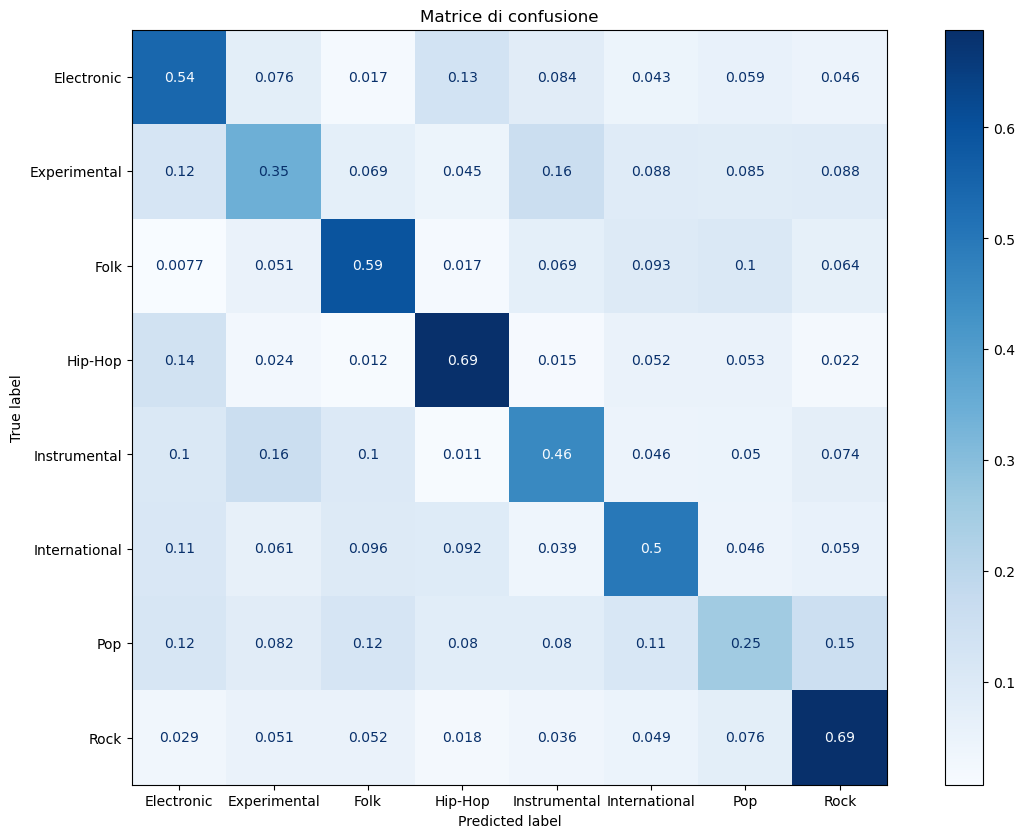

               precision    recall  f1-score   support

   Electronic       0.68      0.54      0.60      2104
 Experimental       0.31      0.35      0.33       739
         Folk       0.56      0.59      0.57       915
      Hip-Hop       0.62      0.69      0.65      1136
 Instrumental       0.38      0.46      0.41       718
International       0.30      0.50      0.37       457
          Pop       0.25      0.25      0.25       765
         Rock       0.78      0.69      0.73      2337

     accuracy                           0.55      9171
    macro avg       0.49      0.51      0.49      9171
 weighted avg       0.58      0.55      0.56      9171

Accuracy:  0.5534838076545633

Numero di tracce assegnate ad ogni classe: 
 [['Electronic' 1675]
 ['Experimental' 812]
 ['Folk' 974]
 ['Hip-Hop' 1262]
 ['Instrumental' 864]
 ['International' 761]
 ['Pop' 772]
 ['Rock' 2051]]


In [9]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


# Predict the test set
predictions = clf.predict(new_X_test_scaled)
# Generate confusion matrix
matrix = plot_confusion_matrix(clf, new_X_test_scaled, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize='true')
plt.title('Matrice di confusione')
plt.show(matrix)

print(classification_report(y_test, predictions))


print("Accuracy: ", accuracy_score(y_test, predictions))

(unique, counts) = np.unique(predictions, return_counts=True)
frequencies = np.asarray((unique, counts)).T

print("\nNumero di tracce assegnate ad ogni classe: \n", frequencies)

In [15]:
new_complete_unscaled_dataset.to_csv("dataset_half_columns.csv")